In [4]:
from EnvelopeModulators import ModFunction, LinearADSR

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
types = ["linear","exp","log","poly","polyFlatTop","sin","cos",]

n_space = np.concatenate((np.linspace(0.1,1.0,5),np.linspace(1.0,20.0,10)))
x = np.linspace(0,1,100)

# use a specific color map
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0,1,len(n_space))))

# create an individual plot for each type
fig, axs = plt.subplots(len(types), 1,figsize=(5, 5*len(types)))
for i, t in enumerate(types):

    axs[i].set_title(t)
    for n in n_space:
        mod = ModFunction(t,n)
        y = mod(x)
        axs[i].plot(x,y,label=f"n = {n:.1f}")
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

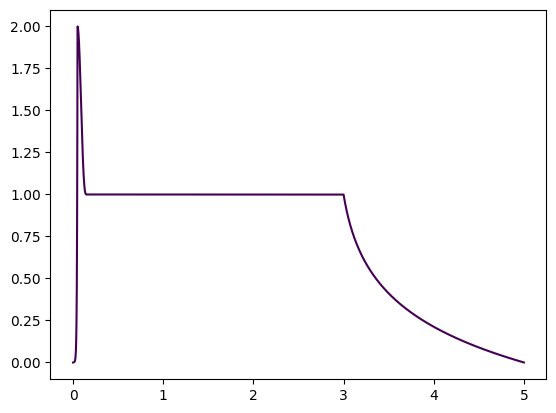

In [9]:
adsr = LinearADSR(2, A=0.05, D=0.1, R=2.0)
adsr.attackFunction = ModFunction("exp", n=9.2)
adsr.decayFunction = ModFunction("cos", n=3.0)
adsr.releaseFunction = ModFunction("log", n=20.0)

adsr.set_tone_duration(3.0, 44100)

t = adsr.time()
y = adsr.envelope()

plt.plot(t,y)